In [4]:
%pip install sqlalchemy
%pip install psycopg2
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib
from sqlalchemy import create_engine
from urllib.parse import quote


username = 'postgres'
password = 'nati@postgres'
hostname = 'localhost'
port = '5432'
database_name = 'TellCo'

# Escape the special characters in the password
escaped_password = quote(password, safe='')

# Create the database engine
engine = create_engine(f'postgresql://{username}:{escaped_password}@{hostname}:{port}/{database_name}')

# Establish a connection
with engine.connect() as connection:
    # Query the data and load it into a pandas DataFrame
    query = """
        SELECT *
        FROM xdr_data
    """
    df = pd.read_sql(query, connection)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Perform EDA on the DataFrame
# Example: Display the first few rows
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
# Group the data by handset and count the occurrences
handset_counts = df['Handset Type'].value_counts()

# Select the top 10 handsets
top_10_handsets = handset_counts.head(10)

# Display the top 10 handsets
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [9]:
# Group the data by manufacturer and count the occurrences
manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Select the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)

# Display the top 3 manufacturers
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [10]:
top_3_manufacturers = manufacturer_counts.head(3).index

#  Iterate over top 3 manufacturers and identify the top 5 handsets for each
for manufacturer in top_3_manufacturers:
    # Filter the DataFrame for the current manufacturer
    filtered_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Calculate the value counts of handsets for the current manufacturer
    handset_counts = filtered_df['Handset Type'].value_counts()

    # Select the top 5 handsets for the current manufacturer
    top_5_handsets = handset_counts.head(5)

    # Print or store the results
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_5_handsets)

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [11]:
# Group the data by 'IMSI' and calculate the required metrics
aggregated_data = df.groupby('IMSI').agg({
    'Dur. (ms)': 'count',
    'Dur. (ms).1': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Calculate the total data volume for YouTube and Google
aggregated_data['Social Media (Bytes)'] = aggregated_data['Social Media UL (Bytes)'] + aggregated_data['Social Media DL (Bytes)']
aggregated_data['Youtube (Bytes)'] = aggregated_data['Youtube UL (Bytes)'] + aggregated_data['Youtube DL (Bytes)']
aggregated_data['Google (Bytes)'] = aggregated_data['Google UL (Bytes)'] + aggregated_data['Google DL (Bytes)']
aggregated_data['Email (Bytes)'] = aggregated_data['Email UL (Bytes)'] + aggregated_data['Email DL (Bytes)']
aggregated_data['Netflix (Bytes)'] = aggregated_data['Netflix UL (Bytes)'] + aggregated_data['Netflix DL (Bytes)']
aggregated_data['Gaming (Bytes)'] = aggregated_data['Gaming UL (Bytes)'] + aggregated_data['Gaming DL (Bytes)']
aggregated_data['Other (Bytes)'] = aggregated_data['Other UL (Bytes)'] + aggregated_data['Other DL (Bytes)']


# Drop the individual columns for YouTube and Google
aggregated_data.drop(columns=['Other UL (Bytes)', 'Other DL (Bytes)', 'Gaming UL (Bytes)', 'Gaming DL (Bytes)', 'Netflix UL (Bytes)', 'Netflix DL (Bytes)', 'Email UL (Bytes)', 'Email DL (Bytes)', 'Social Media UL (Bytes)', 'Social Media DL (Bytes)', 'Youtube UL (Bytes)', 'Youtube DL (Bytes)', 'Google UL (Bytes)', 'Google DL (Bytes)'], inplace=True)

# Rename the columns
aggregated_data = aggregated_data.rename(columns={
    'Dur. (ms)': 'Number of xDR sessions',
    'Dur. (ms).1': 'Total Session duration (ms)',

})

# Display the aggregated data
aggregated_data




,Number of xDR sessions,Total Session duration (ms),Total DL (Bytes),Total UL (Bytes),Social Media (Bytes),Youtube (Bytes),Google (Bytes),Email (Bytes),Netflix (Bytes),Gaming (Bytes),Other (Bytes)
IMSI,,,,,,,,,,,
2.040471e+14,1,869844200.0,78697597.0,60456049.0,1546088.0,40940710.0,9218647.0,3330974.0,28846230.0,43070260.0,4.013605e+08
2.040808e+14,1,877385325.0,194828056.0,37295915.0,715224.0,11959905.0,10438660.0,1520771.0,26592300.0,178048738.0,4.705265e+08
2.082001e+14,1,86019568.0,31376981.0,53794658.0,3122781.0,19882439.0,1624662.0,3657501.0,31830562.0,9124516.0,5.159737e+08
2.082001e+14,1,86254551.0,392918313.0,33583272.0,2577104.0,25657632.0,13811478.0,3855734.0,27785852.0,344105897.0,3.096107e+08
2.082001e+14,2,573924380.0,961767023.0,71325004.0,3426716.0,13840201.0,11665887.0,5564462.0,57343415.0,917684766.0,1.079435e+09
...,...,...,...,...,...,...,...,...,...,...,...
2.082099e+14,1,127367229.0,688815403.0,33888182.0,1256603.0,11621474.0,12047606.0,956312.0,10767515.0,678493990.0,5.883943e+08
2.082099e+14,1,168543142.0,451173021.0,44692550.0,3465755.0,34857460.0,4287813.0,2284566.0,30735254.0,411382679.0,7.526239e+08
2.082099e+14,1,86399932.0,307825104.0,30355487.0,2609666.0,29190696.0,4427934.0,1717645.0,19605741.0,272046636.0,4.567354e+08


In [12]:
# Function to replace outliers with the mean of the rest of the data in the column
def replace_outliers_with_mean(column):
    column_without_outliers = column[(column >= column.quantile(0.05)) & (column <= column.quantile(0.95))]
    mean_without_outliers = column_without_outliers.mean()
    column[column < column.quantile(0.05)] = mean_without_outliers
    column[column > column.quantile(0.95)] = mean_without_outliers
    return column

# Iterate through each column in the DataFrame
for column in df.columns:
    if df[column].dtype != np.number:
        continue
     
    # Replace outliers with the mean of the rest of the data in the column
    df[column] = replace_outliers_with_mean(df[column])
    
    # Replace missing values with the mean of the column
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2920\3653338032.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype != np.number:
C:\Users\User\AppData\Local\Temp\ipykernel_2920\3653338032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < column.quantile(0.05)] = mean_without_outliers
C:\Users\User\AppData\Local\Temp\ipykernel_2920\3653338032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > column.quantile(0.95)] = mean_without_outliers
C:\Users\User\AppData\Loca

In [13]:
# Now which column(s) has missing values where it's numeric
df.isna().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

To analyze the basic metrics in the dataset and provide insights based on the goal of analyzing opportunities for growth and making a recommendation on whether TellCo is worth buying or selling, we can focus on specific columns that are relevant to this objective. Let's explore some of the key columns and the insights we can derive from them:

### 1. Total Duration of the xDR (in ms) - "Dur. (ms)":

- Calculate the mean and median to understand the average and central tendency of the data consumption duration.
- High average duration may indicate higher engagement and usage of the network, which could be a positive sign for growth opportunities.

In [14]:
# Calculate the mean of data consumption duration
mean_duration = df['Dur. (ms)'].mean()

# Calculate the median of data consumption duration
median_duration = df['Dur. (ms)'].median()

# Print the results
print("Mean data consumption duration: {:.2f} ms".format(mean_duration))
print("Median data consumption duration: {:.2f} ms".format(median_duration))

Mean data consumption duration: 96193.62 ms
Median data consumption duration: 86400.00 ms


### 2. Average Bearer Throughput for Downlink (kbps) - "Avg Bearer TP DL (kbps)":

- Analyze the mean and median to understand the average and central tendency of the download throughput.
- Higher average throughput indicates a better network experience for customers, which is desirable for growth and customer satisfaction.

In [15]:
# Calculate the mean of download throughput
mean_throughput_dl = df['Avg Bearer TP DL (kbps)'].mean()

# Calculate the median of download throughput
median_throughput_dl = df['Avg Bearer TP DL (kbps)'].median()

# Print the results
print("Mean download throughput: {:.2f} kbps".format(mean_throughput_dl))
print("Median download throughput: {:.2f} kbps".format(median_throughput_dl))

Mean download throughput: 9851.84 kbps
Median download throughput: 124.00 kbps


### 3. Social Media data volume (in Bytes) - "Social Media DL (Bytes)" and "Social Media UL (Bytes)":

- Analyze the mean, median, and distribution of social media data volume to understand the popularity and usage of social media on the network.
- Higher mean and median values indicate a significant amount of social media usage, which can be an opportunity for targeted marketing or partnerships with social media platforms.

Mean social media data volume (downlink): 1795621.17 bytes
Median social media data volume (downlink): 1795621.17 bytes
Mean social media data volume (uplink): 32928.16 bytes
Median social media data volume (uplink): 32928.16 bytes


<Axes: ylabel='Frequency'>

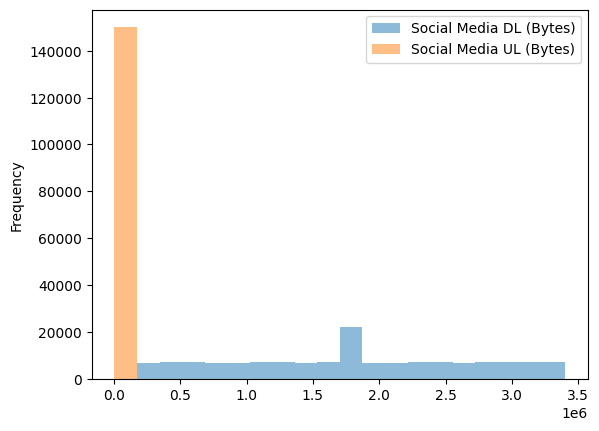

In [16]:
import pandas as pd

# Assuming the dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame if different

# Calculate the mean of social media data volume (downlink)
mean_social_media_dl = df['Social Media DL (Bytes)'].mean()

# Calculate the median of social media data volume (downlink)
median_social_media_dl = df['Social Media DL (Bytes)'].median()

# Calculate the mean of social media data volume (uplink)
mean_social_media_ul = df['Social Media UL (Bytes)'].mean()

# Calculate the median of social media data volume (uplink)
median_social_media_ul = df['Social Media UL (Bytes)'].median()

# Print the results
print("Mean social media data volume (downlink): {:.2f} bytes".format(mean_social_media_dl))
print("Median social media data volume (downlink): {:.2f} bytes".format(median_social_media_dl))
print("Mean social media data volume (uplink): {:.2f} bytes".format(mean_social_media_ul))
print("Median social media data volume (uplink): {:.2f} bytes".format(median_social_media_ul))

# Visualize the distribution of social media data volume
df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)']].plot(kind='hist', bins=20, alpha=0.5)

### 4. Total DL (Bytes) and Total UL (Bytes):

- Analyzing the mean and median of total data volume can provide insights into the overall data usage on the network.
- Higher average values indicate higher data consumption, which can be an opportunity for offering larger data plans or identifying heavy data users for targeted promotions.

In [17]:
# Calculate the mean of total data volume (downlink) in megabytes (MB)
mean_total_dl_mb = df['Total DL (Bytes)'].mean() / (1024 * 1024)

# Calculate the median of total data volume (downlink) in megabytes (MB)
median_total_dl_mb = df['Total DL (Bytes)'].median() / (1024 * 1024)

# Calculate the mean of total data volume (uplink) in megabytes (MB)
mean_total_ul_mb = df['Total UL (Bytes)'].mean() / (1024 * 1024)

# Calculate the median of total data volume (uplink) in megabytes (MB)
median_total_ul_mb = df['Total UL (Bytes)'].median() / (1024 * 1024)

# Print the results
print("Mean total data volume (downlink): {:.2f} MB".format(mean_total_dl_mb))
print("Median total data volume (downlink): {:.2f} MB".format(median_total_dl_mb))
print("Mean total data volume (uplink): {:.2f} MB".format(mean_total_ul_mb))
print("Median total data volume (uplink): {:.2f} MB".format(median_total_ul_mb))

Mean total data volume (downlink): 433.61 MB
Median total data volume (downlink): 433.61 MB
Mean total data volume (uplink): 39.22 MB
Median total data volume (uplink): 39.22 MB


In [18]:
# Define the relevant quantitative fields
relevant_fields = [
    'Dur. (ms)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'HTTP DL (Bytes)',
    'HTTP UL (Bytes)',
    'Activity Duration DL (ms)',
    'Activity Duration UL (ms)',
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Youtube DL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    'Other DL (Bytes)',
    'Other UL (Bytes)',
    'Total DL (Bytes)',
    'Total UL (Bytes)'
]

# ANSI escape sequence for bold text
BOLD = '\033[1m'

# Compute dispersion parameters for each relevant field
for field in relevant_fields:
    # Calculate dispersion parameters
    field_range = df[field].max() - df[field].min()
    field_variance = df[field].var()
    field_std = df[field].std()
    field_iqr = df[field].quantile(0.75) - df[field].quantile(0.25)
    
    # Print the dispersion parameters and provide insights
    print("Dispersion parameters for {}{}{}: ".format(BOLD, field, '\033[0m'))
    
    print("Range: {:.2f}".format(field_range))
    print("Variance: {:.2f}".format(field_variance))
    print("Standard Deviation: {:.2f}".format(field_std))
    print("Interquartile Range (IQR): {:.2f}".format(field_iqr))
    print('______________________________')

Dispersion parameters for Dur. (ms): 
Range: 221712.00
Variance: 2068388079.02
Standard Deviation: 45479.53
Interquartile Range (IQR): 43679.00
______________________________
Dispersion parameters for Avg RTT DL (ms): 
Range: 250.00
Variance: 1291.03
Standard Deviation: 35.93
Interquartile Range (IQR): 21.63
______________________________
Dispersion parameters for Avg RTT UL (ms): 
Range: 49.00
Variance: 83.05
Standard Deviation: 9.11
Interquartile Range (IQR): 5.72
______________________________
Dispersion parameters for Avg Bearer TP DL (kbps): 
Range: 62533.00
Variance: 234952769.74
Standard Deviation: 15328.17
Interquartile Range (IQR): 12451.00
______________________________
Dispersion parameters for Avg Bearer TP UL (kbps): 
Range: 10539.00
Variance: 2873548.67
Standard Deviation: 1695.15
Interquartile Range (IQR): 864.57
______________________________
Dispersion parameters for TCP DL Retrans. Vol (Bytes): 
Range: 38792278.00
Variance: 14413225614752.03
Standard Deviation: 379647

In [19]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

## Graphical Univariate Analysis

### Total Duration of the xDR - Dur. (ms)

In [43]:
# Round the 'Dur. (ms)' values to one decimal point and store them in a separate Series
rounded_duration = df['Dur. (ms)'].round(1)

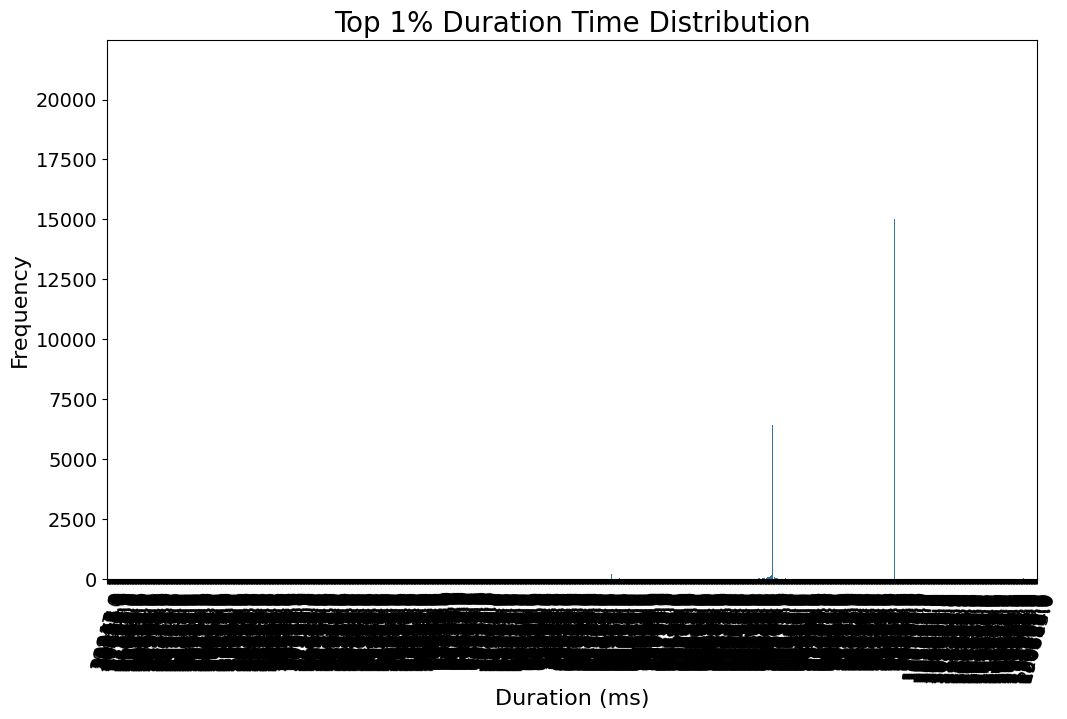

In [39]:
# Calculate the top 1% threshold based on the rounded values
top_1_threshold = int(len(rounded_duration) * 0.01)

# Get the top 1% of the rounded total duration of the xDR
top_1_duration = rounded_duration.value_counts().head(top_1_threshold)

# Create a new DataFrame with the top 1% durations and their frequencies
top_1_duration_freq = pd.DataFrame({'Duration (ms)': top_1_duration.index, 'Frequency': top_1_duration.values})

# Plot the top 1% duration distribution
plot_bar(top_1_duration_freq, 'Duration (ms)', 'Frequency', 'Top 1% Duration Time Distribution', 'Duration (ms)', 'Frequency')


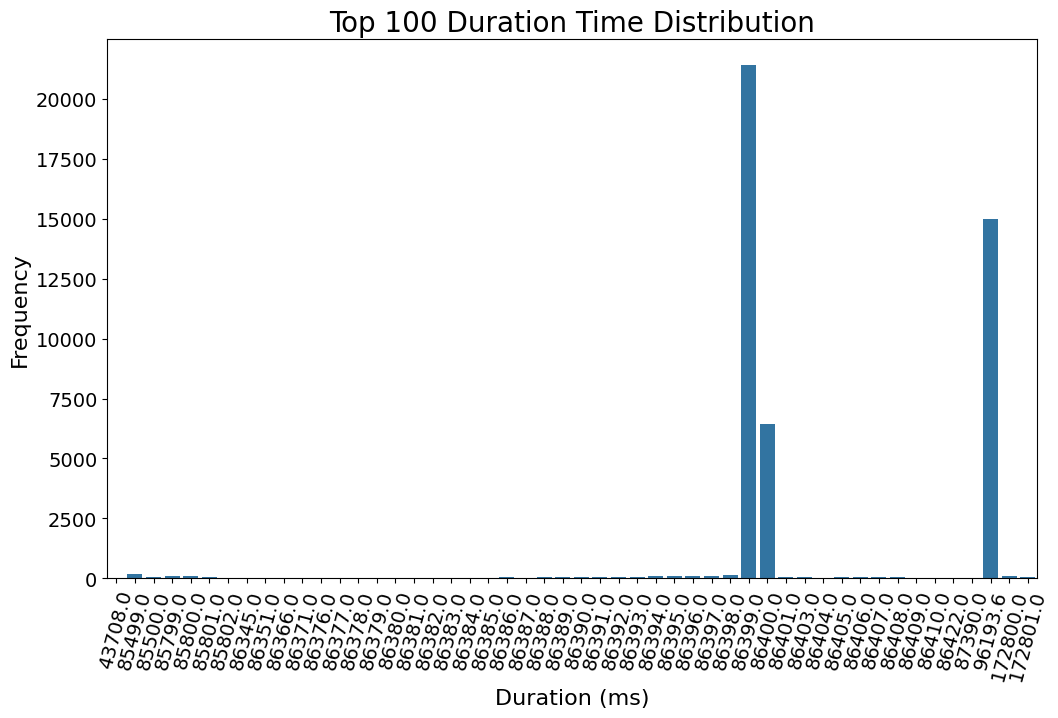

In [41]:
# Calculate the top 100 durations
top_100_duration = rounded_duration.value_counts().head(50)

# Create a new DataFrame with the top 100 durations and their frequencies
top_100_duration_freq = pd.DataFrame({'Duration (ms)': top_100_duration.index, 'Frequency': top_100_duration.values})

# Plot the top 100 duration distribution
plot_bar(top_100_duration_freq, 'Duration (ms)', 'Frequency', 'Top 100 Duration Time Distribution', 'Duration (ms)', 'Frequency')

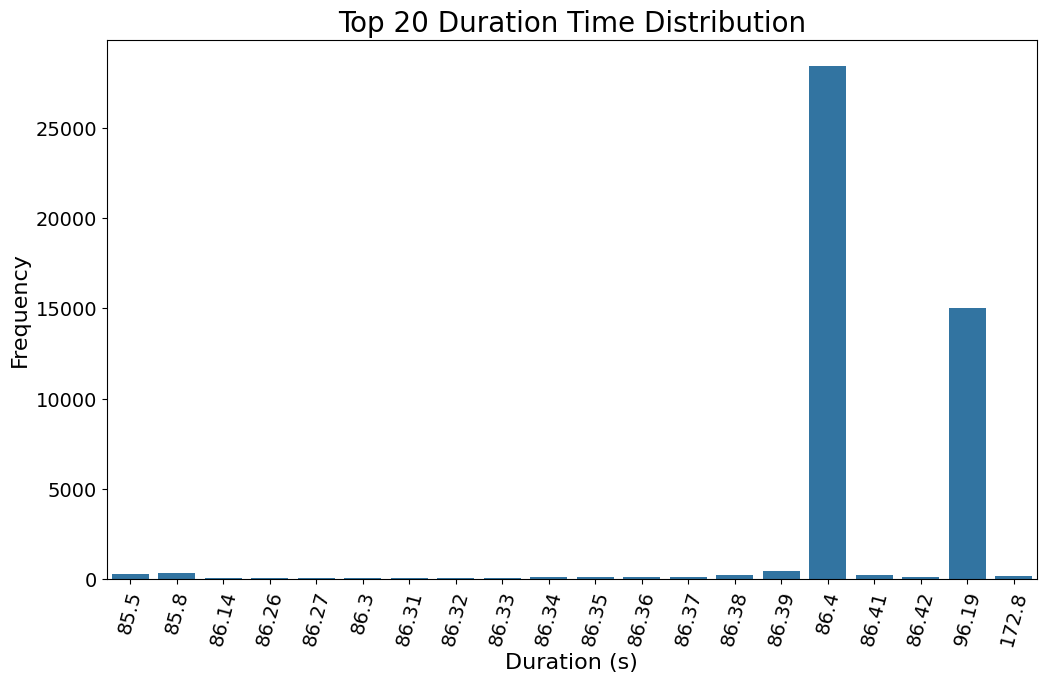

In [45]:
# Round the 'Dur. (ms)' values to one decimal point and store them in a separate Series
rounded_duration = (df['Dur. (ms)'] / 1000).round(2)

# Calculate the top 20 durations
top_20_duration = rounded_duration.value_counts().head(20)

# Create a new DataFrame with the top 20 durations and their frequencies
top_20_duration_freq = pd.DataFrame({'Duration (s)': top_20_duration.index, 'Frequency': top_20_duration.values})

# Plot the top 20 duration distribution
plot_bar(top_20_duration_freq, 'Duration (s)', 'Frequency', 'Top 20 Duration Time Distribution', 'Duration (s)', 'Frequency')

### Average Round Trip Time measurement Downlink direction - Avg RTT DL (ms)

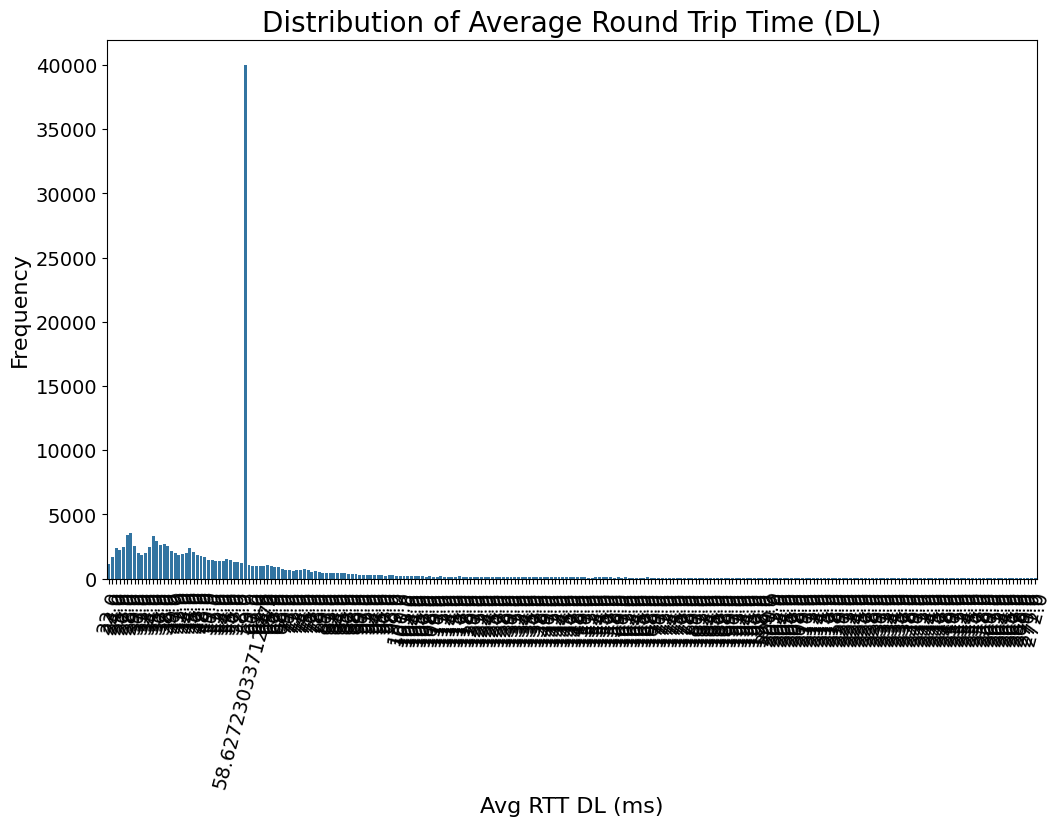

In [22]:
# Calculate the top 10% threshold
top_10_threshold = int(len(df) * 0.1)

# Get the top 10% of the average round trip time in the downlink direction
top_rtt_dl = df['Avg RTT DL (ms)'].value_counts().head(top_10_threshold)

# Create a new DataFrame with the top average round trip times and their frequencies
top_rtt_dl_freq = pd.DataFrame({'Avg RTT DL (ms)': top_rtt_dl.index, 'Frequency': top_rtt_dl.values})

# Plot the bar plot
plot_bar(df=top_rtt_dl_freq,
         x_col='Avg RTT DL (ms)',
         y_col='Frequency',
         title='Frequency of Top 10% Average Round Trip Time (DL)',
         xlabel='Avg RTT DL (ms)',
         ylabel='Frequency')

### Handset Manufacturer

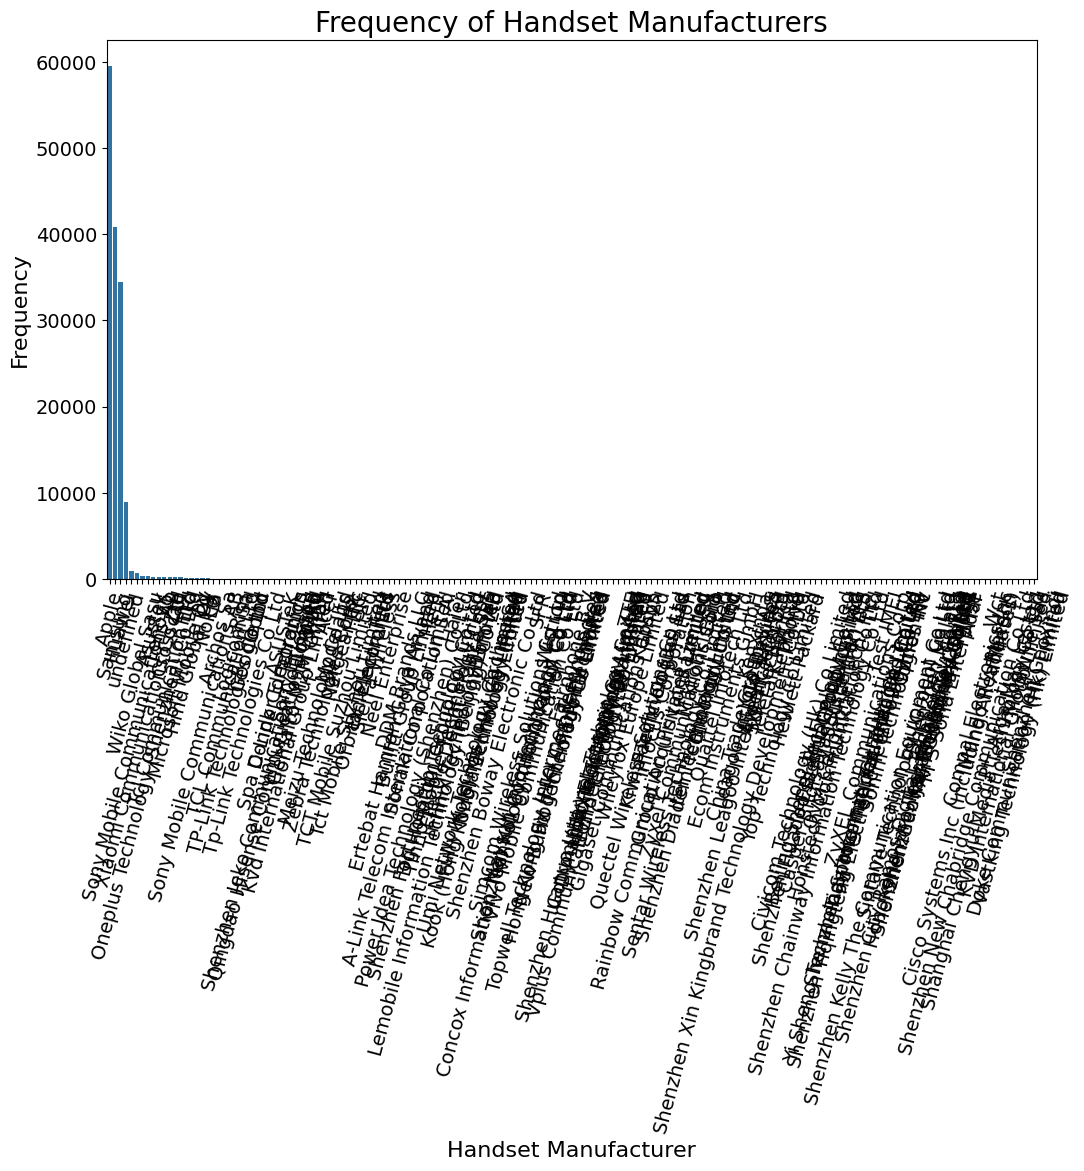

In [23]:
# Calculate the frequency of each handset manufacturer
manufacturer_freq = df['Handset Manufacturer'].value_counts().reset_index()

# Rename the columns to match the expected column names in the plot_bar function
manufacturer_freq.columns = ['Handset Manufacturer', 'Frequency']

# Plot the bar plot
plot_bar(df=manufacturer_freq,
         x_col='Handset Manufacturer',
         y_col='Frequency',
         title='Frequency of Handset Manufacturers',
         xlabel='Handset Manufacturer',
         ylabel='Frequency')

As you can see, since there are many Handset Manufacturers the x-axis is overwhalmed. But most of this manufacturers actually have few users. So insteady of looking at the distribution of all manufacturers, let's filter out the popular ones with the median then plot the popular Handset manufacturers. 

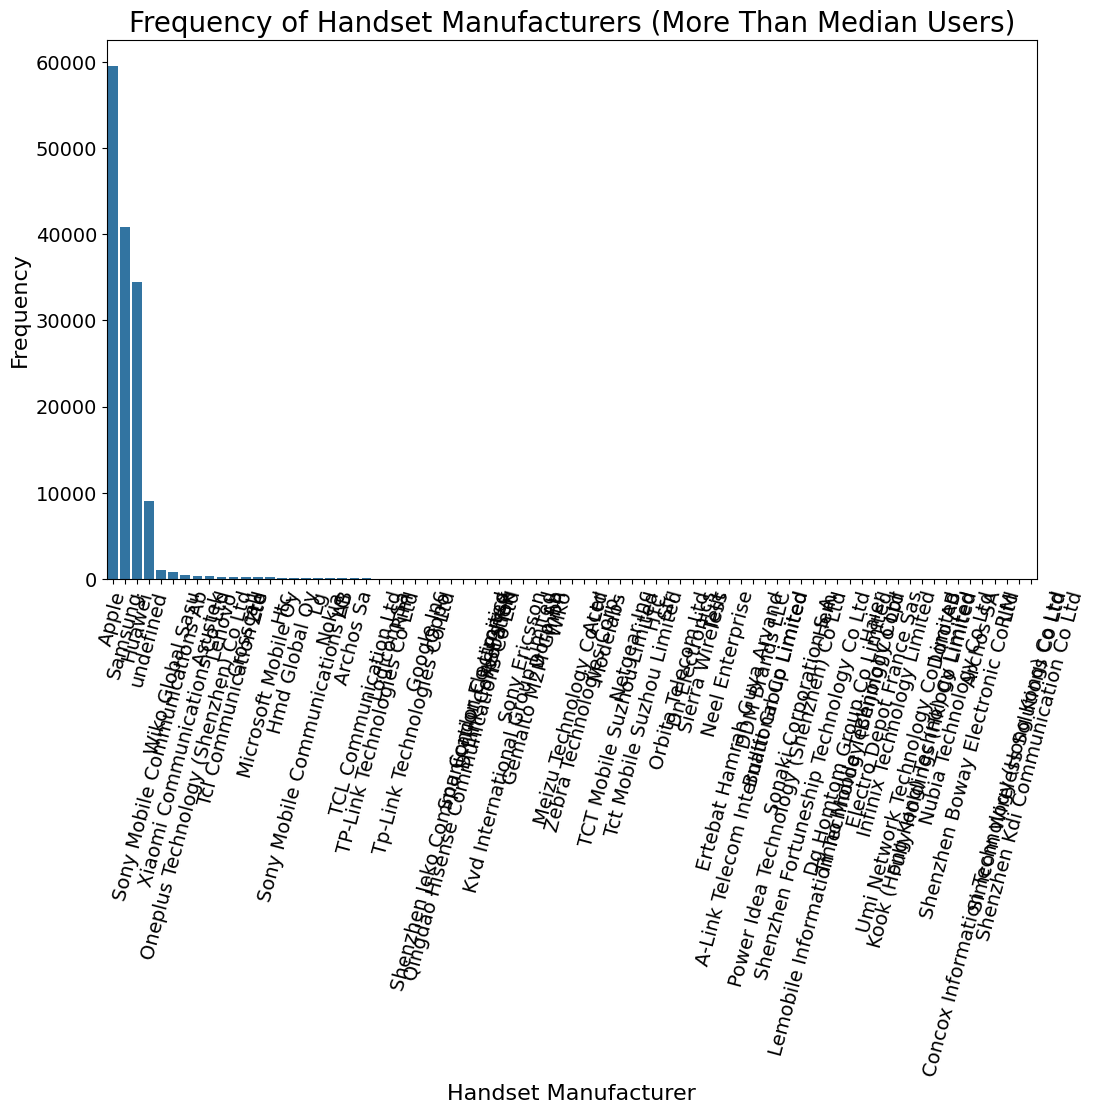

In [24]:
# Calculate the median number of users per handset manufacturer
manufacturer_counts = df['Handset Manufacturer'].value_counts()
median_count = manufacturer_counts.median()

# Filter the manufacturers that have more than the median number of users
popular_manufacturers = manufacturer_counts[manufacturer_counts > median_count]

# Create a new DataFrame with the filtered manufacturers and their frequencies
popular_manufacturer_freq = pd.DataFrame({'Handset Manufacturer': popular_manufacturers.index, 'Frequency': popular_manufacturers.values})

# Plot the bar plot
plot_bar(df=popular_manufacturer_freq,
         x_col='Handset Manufacturer',
         y_col='Frequency',
         title='Frequency of Handset Manufacturers (More Than Median Users)',
         xlabel='Handset Manufacturer',
         ylabel='Frequency')

It's still overwhalmed. So let's pick the top 10% only.

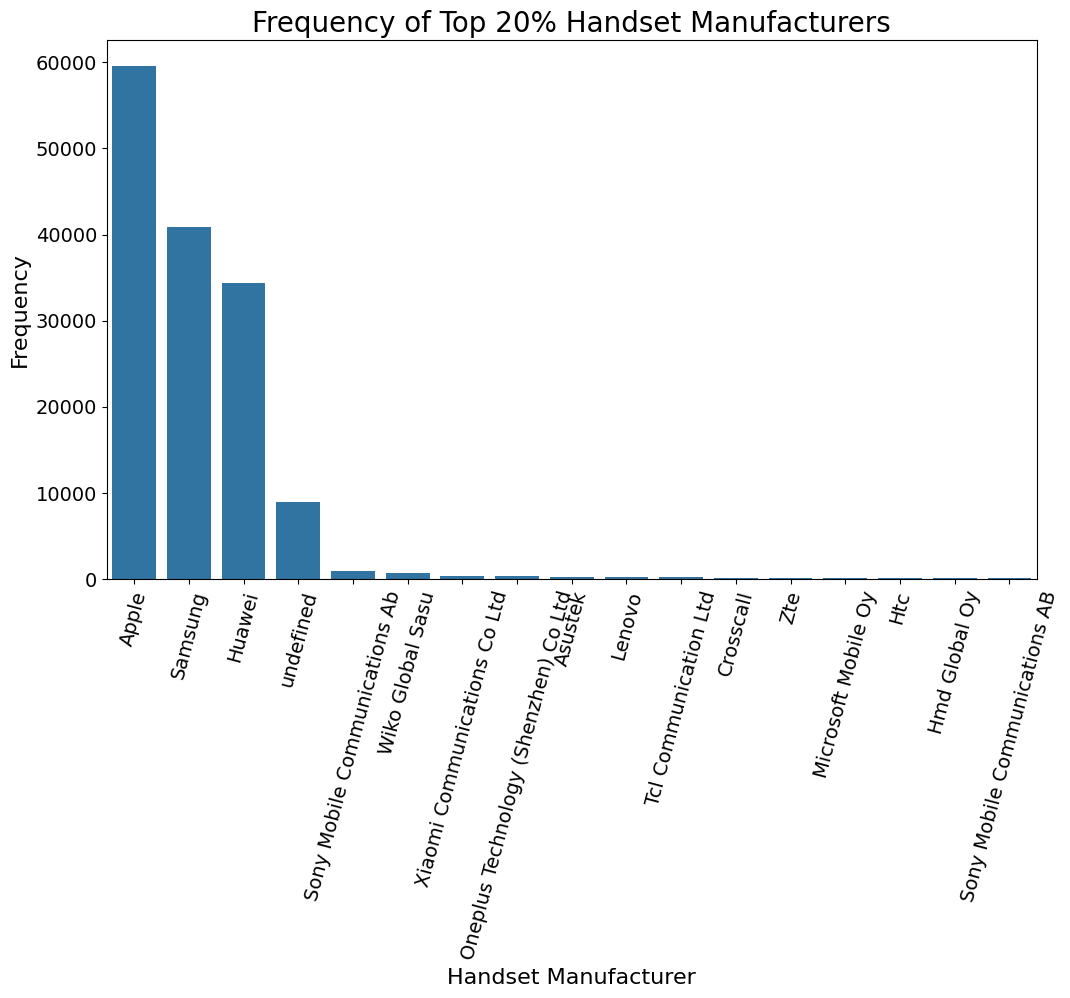

In [28]:
# Calculate the total number of manufacturers
total_manufacturers = len(df['Handset Manufacturer'].unique())

# Calculate the top 10% threshold
top_10_threshold = int(total_manufacturers * 0.1)

# Calculate the frequency count for each manufacturer
manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Get the top 10% manufacturers based on frequency
top_manufacturers = manufacturer_counts.head(top_10_threshold)

# Create a new DataFrame with the top manufacturers and their frequencies
top_manufacturer_freq = pd.DataFrame({'Handset Manufacturer': top_manufacturers.index, 'Frequency': top_manufacturers.values})

# Plot the bar plot
plot_bar(df=top_manufacturer_freq,
         x_col='Handset Manufacturer',
         y_col='Frequency',
         title='Frequency of Top 20% Handset Manufacturers',
         xlabel='Handset Manufacturer',
         ylabel='Frequency')

### Total DL (Bytes)

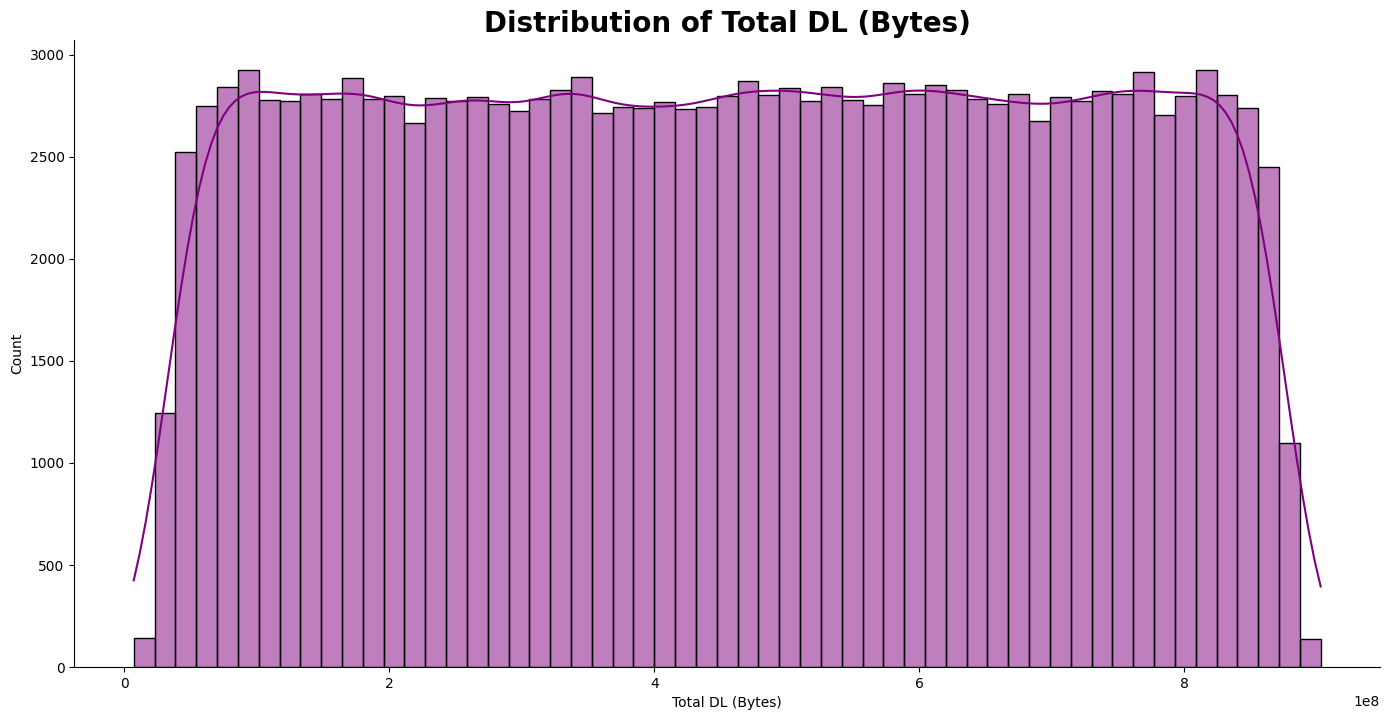

In [ ]:
# Plot a histogram to visualize the distribution of the total data volume received by the mobile station (MS).
plot_hist(df, 'Total DL (Bytes)', 'purple')

### Total UL (Bytes)

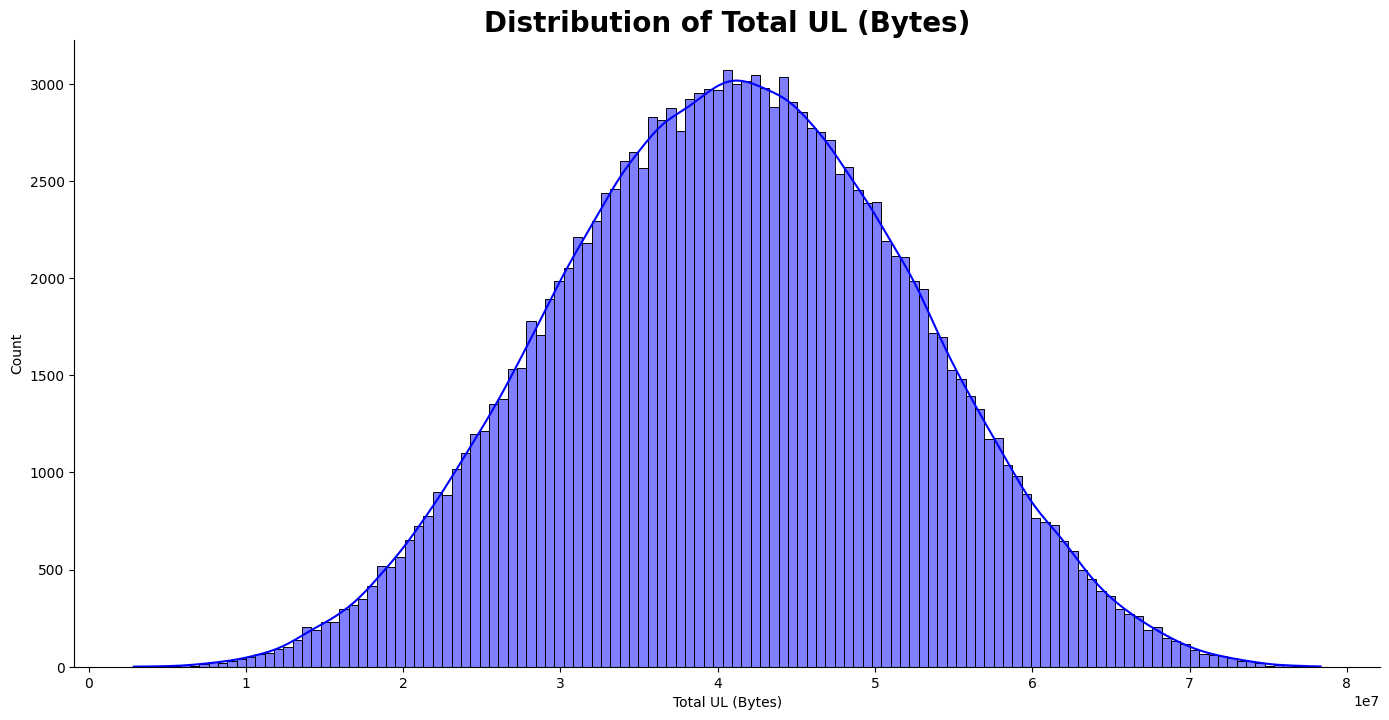

In [ ]:
# Plot a histogram to visualize the distribution of the total data volume sent by the mobile station (MS).
plot_hist(df, 'Total UL (Bytes)', 'Blue')

# BiVariable Analysis

Let's generate a data frame with the following characteristics. Out of all users, let's calculate the total upload and total download data volume used in each application listed in the database. Then let's plot the distribution of total upload plus total download data vs. each application in one plot.

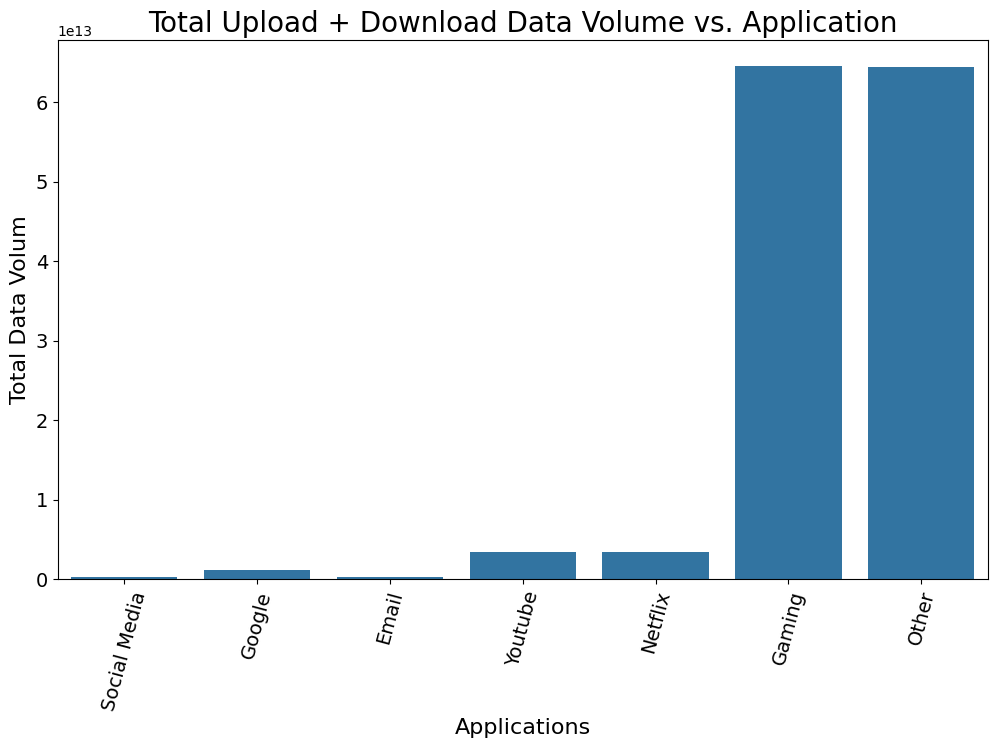

In [54]:
# List of application columns
application_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Calculate total upload and download data volumes for each application
total_data = {}
for app in application_columns:
    total_data[app] = df[app + ' DL (Bytes)'].sum() + df[app + ' UL (Bytes)'].sum()

# Create a new DataFrame with the total data volumes
total_data_df = pd.DataFrame.from_dict(total_data, orient='index', columns=['Total Data Volume'])
total_data_df.index.name = 'Applications'


plot_bar(df=total_data_df,
         x_col= total_data_df.index,
         y_col='Total Data Volume',
         title='Total Upload + Download Data Volume vs. Application',
         xlabel='Applications',
         ylabel='Total Data Volum')


# Variable transformations 

Now let's segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

First let's calculate the total duration for all sessions for each user. We will use IMEI as a unique identifier of each users.

In [63]:
# Step 1: Calculate the total duration for all sessions for each user
user_total_duration = df.groupby('IMEI')['Dur. (ms)'].sum().reset_index()
user_total_duration.rename(columns={'Dur. (ms)': 'Total Duration'}, inplace=True)
print("Step 1: Total duration for all sessions per user")
print(user_total_duration.head())

Step 1: Total duration for all sessions per user
           IMEI  Total Duration
0  3.524551e+13        342340.0
1  3.524551e+13         74229.0
2  3.524551e+13         82229.0
3  3.524551e+13        125400.0
4  3.524551e+13         91040.0


Then we will calculate the decile values for the total duration. We will use the quantile() function to determine the decile values.

In [64]:
# Step 2: Calculate the decile values for the total duration
decile_values = user_total_duration['Total Duration'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).values
print("Step 2: Decile values for total duration")
print(decile_values)

Step 2: Decile values for total duration
[ 42311.7  77122.2  86399.   95160.6  99932.5 128732.2 158892.8 182258.8
 253027.1]


We will then assign decile classes to each user. We will use the cut() function to assign decile classes based on the total duration values and the decile values calculated in the previous step.

In [65]:
# Step 3: Assign decile classes to each user
user_total_duration['Decile Class'] = pd.cut(user_total_duration['Total Duration'], bins=decile_values, labels=False, include_lowest=True)
print("Step 3: Decile class assignment for each user")
print(user_total_duration.head())
print()

Step 3: Decile class assignment for each user
           IMEI  Total Duration  Decile Class
0  3.524551e+13        342340.0           NaN
1  3.524551e+13         74229.0           0.0
2  3.524551e+13         82229.0           1.0
3  3.524551e+13        125400.0           4.0
4  3.524551e+13         91040.0           2.0



Finally we will calculate the total data (DL+UL) per decile class. We will merge the user_total_duration DataFrame with the original data DataFrame df to obtain the total data per decile class.

In [72]:
# Step 4: Calculate the total data (DL+UL) per decile class
merged_df = pd.merge(df, user_total_duration[['IMEI', 'Decile Class']], on='IMEI', how='left')
decile_data = merged_df.groupby('Decile Class')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# Convert data volume to GB
decile_data['Total DL (GB)'] = decile_data['Total DL (Bytes)'] / 1e9
decile_data['Total UL (GB)'] = decile_data['Total UL (Bytes)'] / 1e9
decile_data['Total Data (GB)'] = decile_data['Total DL (GB)'] + decile_data['Total UL (GB)'] 

# Remove the original byte columns
decile_data = decile_data.drop(['Total DL (Bytes)', 'Total UL (Bytes)'], axis=1)

print("Step 4: Total data (DL+UL) per decile class")
print(decile_data)

Step 4: Total data (DL+UL) per decile class
   Decile Class  Total DL (GB)  Total UL (GB)  Total Data (GB)
0           0.0    5421.233644     491.891288      5913.124933
1           1.0    6094.315205     549.168803      6643.484008
2           2.0    3135.686956     283.995348      3419.682304
3           3.0    4479.431604     405.294284      4884.725887
4           4.0    5308.476429     480.341031      5788.817460
5           5.0    5017.044865     450.824219      5467.869084
6           6.0    6264.525068     567.494511      6832.019578
7           7.0    7493.769513     675.545748      8169.315261


# Correlation Analysis

In [80]:
# Step 1: Create a new DataFrame for total data volume
total_data_volume = pd.DataFrame()

# Calculate the total data volume for each application (UL + DL)
total_data_volume['Social Media Total'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
total_data_volume['Youtube Total'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
total_data_volume['Netflix Total'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
total_data_volume['Google Total'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
total_data_volume['Email Total'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
total_data_volume['Gaming Total'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
total_data_volume['Other Total'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Step 2: Generate the correlation matrix
correlation_matrix = total_data_volume.corr()

# Print the correlation matrix
print("Correlation Matrix:")

correlation_matrix

<class 'pandas.core.frame.DataFrame'>
Correlation Matrix:


,Social Media Total,Youtube Total,Netflix Total,Google Total,Email Total,Gaming Total,Other Total
Social Media Total,1.000000,-0.002165,0.000115,-0.003116,0.003984,0.000511,0.006950
Youtube Total,-0.002165,1.000000,0.000693,-0.001295,-0.001576,-0.003783,0.003596
Netflix Total,0.000115,0.000693,1.000000,-0.000807,0.004155,-0.002800,-0.009396
Google Total,-0.003116,-0.001295,-0.000807,1.000000,-0.000678,0.001350,-0.000653
Email Total,0.003984,-0.001576,0.004155,-0.000678,1.000000,0.001533,-0.001904
Gaming Total,0.000511,-0.003783,-0.002800,0.001350,0.001533,1.000000,-0.000155
Other Total,0.006950,0.003596,-0.009396,-0.000653,-0.001904,-0.000155,1.000000


# Dimensionality Reduction

In [88]:
# Step 1: Perform feature scaling
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=np.number)
scaled_data = scaler.fit_transform(numerical_columns)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Number of components to retain
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 4: Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Step 5: Print the transformed data
pca_df.head(10)

Explained Variance Ratio:
[0.17539373 0.06727814]


,PC1,PC2
0,-1.723553,0.555769
1,-1.499699,0.594548
2,-0.964466,0.484886
3,-1.491130,0.677846
4,-0.967498,0.466196
5,-1.582565,0.583106
6,-1.332614,0.595932
7,-1.143524,-0.485390
8,-1.403411,0.618004
9,1.209750,-1.360961
